In [25]:
! pip install numpy 
! pip install scipy
! pip install matplotlib
! pip install random
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import time
import random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


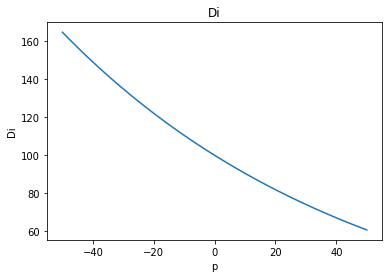

In [26]:
#EXERCISE 1

#Revenue Maximisation Problem using the Simplex Method
#let's visualise how it looks like for example in the case of i=1, a=100

def Di(p):
 return 100*np.exp(-p/100)

p = np.linspace(-50, 50, 100)
Di = np.vectorize(Di)
fig = plt.figure()
plt.title("Di")
plt.plot(p, Di(p))
plt.xlabel('p')
plt.ylabel('Di')
plt.show()


In [30]:


initial_prices=np.array([20,20,20]) # we set the three initial prices
A=np.array([100,150,300])    
seats=150

def Revenue(parameters):  #cost function
    P1=parameters[0]
    P2=parameters[1]
    P3=parameters[2]
    return -1*((A[0]*np.exp(-P1/A[0]))+ (A[1]*np.exp(-P2/A[1]))+(A[2]*np.exp(-P3/A[2]))) # We just put a negative sign to change the maximizatio problem to a minimization one
                                                                                                           
def constraint(parameters,seats):
    P1=parameters[0]
    P2=parameters[1]
    P3=parameters[2] 
    D1=A[0]*np.exp(-P1/A[0])
    D2=A[1]*np.exp(-P2/A[1])
    D3=A[2]*np.exp(-P3/A[2])
    D=D1+D2+D3-seats
    return D

def model(parameters):
    P1=parameters[0]
    P2=parameters[1]
    P3=parameters[2] 
    D1=A[0]*np.exp(-P1/A[0])
    D2=A[1]*np.exp(-P2/A[1])
    D3=A[2]*np.exp(-P3/A[2])
    return D1,D2,D3

seats=150
cons={'type': 'eq', 'fun': constraint, 'args':[seats]}    
bound=([0,None],[0,None],[0,None])
start_time = time.time()
solution = minimize(Revenue,initial_prices,method="SLSQP", constraints=cons,bounds=bound)
seats_per_bucket=model(solution.x)

print("--- time used is %s seconds ---" % (time.time() - start_time))
print("\nPart B\n")
print("the optimal prices are:",solution.x,"\n")
print("the number of people expected to buy per fare bucket are :",seats_per_bucket)
print(solution)

##Question C) a)
#with additional 3 seats
new_seats=153
new_cons={'type': 'eq', 'fun': constraint, 'args':[new_seats]}

solution_153=minimize(Revenue,initial_prices,method='SLSQP', constraints=new_cons,bounds=bound)
seats_per_bucket153=model(solution_153.x)

print("\nPart C\n")
print("For a maximum number of 153 seats,\n ")
print("the optimal prices are:",solution_153.x,"\n")
print("the number of people expected to buy per fare bucket are :",seats_per_bucket153)

#Question C) b) 
#By squeezing three additional  seats the optimal revenue is going to  change by a factor of 0.02
change_in_price=abs(solution_153.fun)-abs(solution.fun)
print("the change in price from adding 3 seats is:",change_in_price)
price_change2=solution_153.x-solution.x
print("Each price should be reduced by approximately %.2f"%abs(price_change2[0]))


--- time used is 0.03382706642150879 seconds ---

Part B

the optimal prices are: [205.67432384 244.04082524 307.23660367] 

the number of people expected to buy per fare bucket are : (12.786973374310277, 29.479539874741203, 107.73348679276431)
     fun: -150.00000004181578
     jac: array([0.12786865, 0.19652939, 0.35910988])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([205.67432384, 244.04082524, 307.23660367])

Part C

For a maximum number of 153 seats,
 
the optimal prices are: [203.15585188 240.54315587 301.77742854] 

the number of people expected to buy per fare bucket are : (13.113099169547754, 30.17501472541634, 109.71188615345999)
the change in price from adding 3 seats is: 3.0000000066083032
Each price should be reduced by approximately 2.52
